In [344]:
#import torch
import numpy as np
#import torchvision
import matplotlib.pyplot as plt
import cv2
import torch.nn as nn
import time
import os
from tqdm import tqdm
from scipy import io
from scipy.io import savemat
import glob
import argparse
#import torchvision.transforms.functional as F
import h5py
from PIL import Image, ImageChops
import itertools
import pydicom
import torch
import os
import glob
import scipy.stats
import sys
import numpy as np
import warnings
from torchvision import transforms as transforms
import mat73
warnings.filterwarnings('ignore')

In [302]:
### eval ###
root = '/home/juhyung/gate/denoise/denoise/log'
eval_num = 23
eval_fnames = glob.glob(os.path.join(root, '{:05d}*'.format(eval_num)))
all_fnames = glob.glob(os.path.join(eval_fnames[0], 'eval/result*'))
print(len(all_fnames))
idx = 0

32


0
(2, 384, 384)


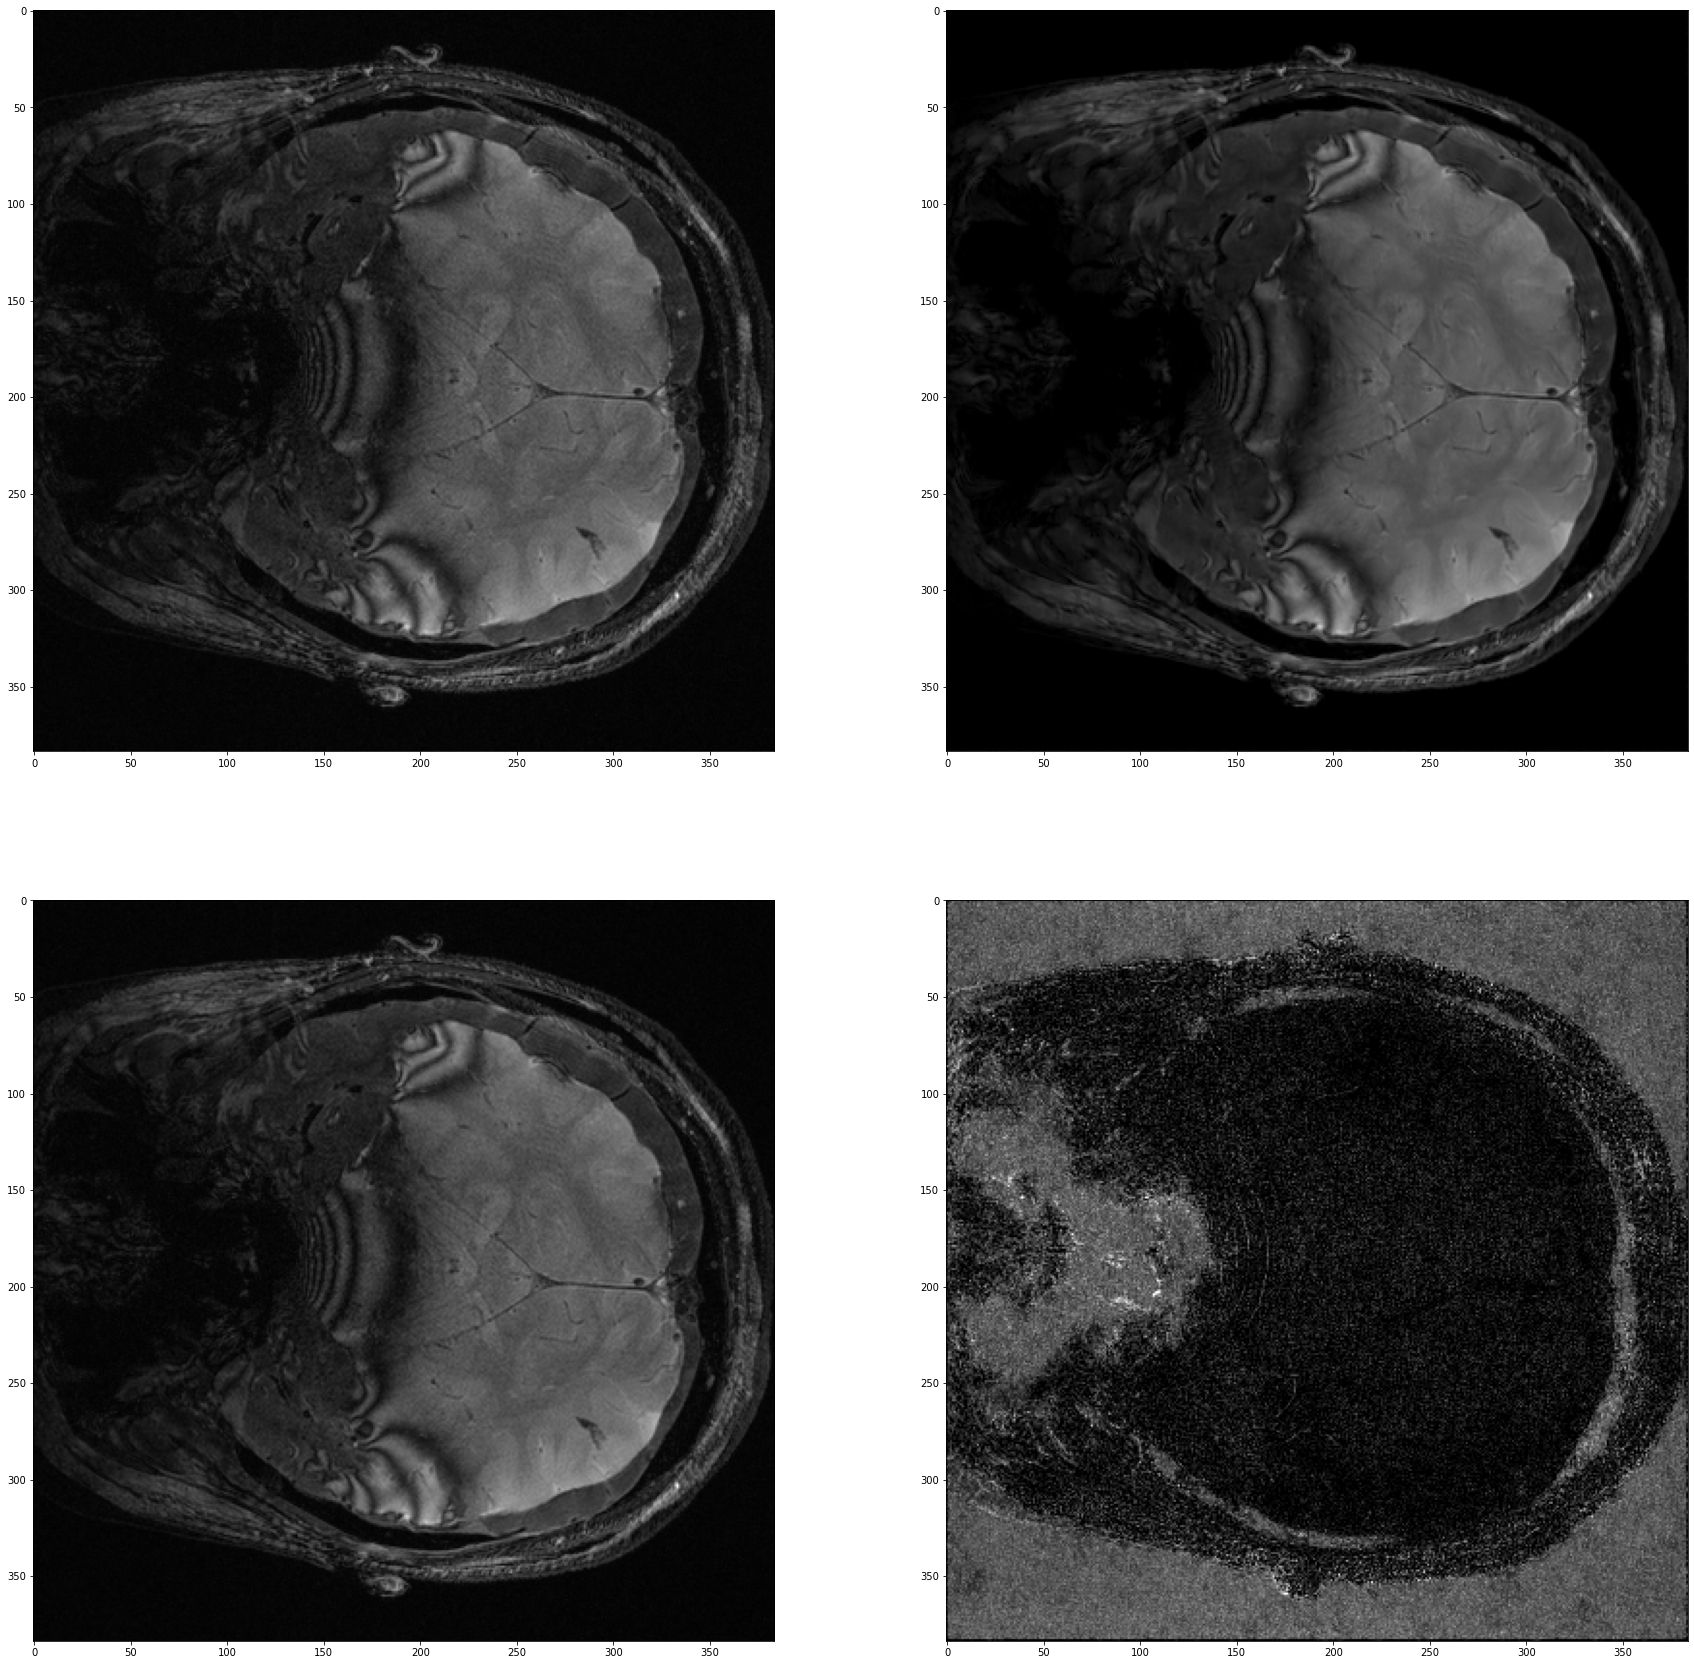

In [303]:
idx = 0
inp = np.array(io.loadmat(eval_fnames[0] + '/eval/result_{}.mat'.format(idx))['inp'],dtype=float).squeeze()
out = np.array(io.loadmat(eval_fnames[0] + '/eval/result_{}.mat'.format(idx))['out'],dtype=float).squeeze()
lab = np.array(io.loadmat(eval_fnames[0] + '/eval/result_{}.mat'.format(idx))['lab'],dtype=float).squeeze()
print(idx)
xmin = 0
xmax = 400
ymin = 0
ymax = 400
print(inp.shape)
inp = np.sqrt(inp[0,...] ** 2 + inp[1,...] ** 2)
out = np.sqrt(out[0,...] ** 2 + out[1,...] ** 2)
lab = np.sqrt(lab[0,...] ** 2 + lab[1,...] ** 2)

inp = np.rot90(inp)
out = np.rot90(out)
lab = np.rot90(lab)

vma = np.max(inp[xmin:xmax,ymin:ymax])# * 0.4
vmi = np.min(inp[xmin:xmax,ymin:ymax])
plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
plt.imshow(inp[xmin:xmax,ymin:ymax],cmap='gray',vmin=vmi,vmax=vma)
plt.subplot(2,2,2)
plt.imshow(out[xmin:xmax,ymin:ymax],cmap='gray',vmin=vmi,vmax=vma)
plt.subplot(2,2,3)
plt.imshow(lab[xmin:xmax,ymin:ymax],cmap='gray',vmin=vmi,vmax=vma)
plt.subplot(2,2,4)
plt.imshow(abs(out[xmin:xmax,ymin:ymax]-lab[xmin:xmax,ymin:ymax])*10,cmap='gray',vmin=vmi,vmax=vma)
plt.show()
idx += 1

In [545]:
### train ###
root = '/home/juhyung/denoise/denoise/log'
log_num = 26
eval_num = 50
train_fnames = glob.glob(os.path.join(root, '{:05d}*'.format(log_num)))
eval_fnames = glob.glob(os.path.join(train_fnames[0], 'valid/', 'valid_hist_{:d}*'.format(eval_num)))
all_fnames = glob.glob(os.path.join(eval_fnames[0], 'data*'))
print(len(all_fnames))
idx = 0

1284


0


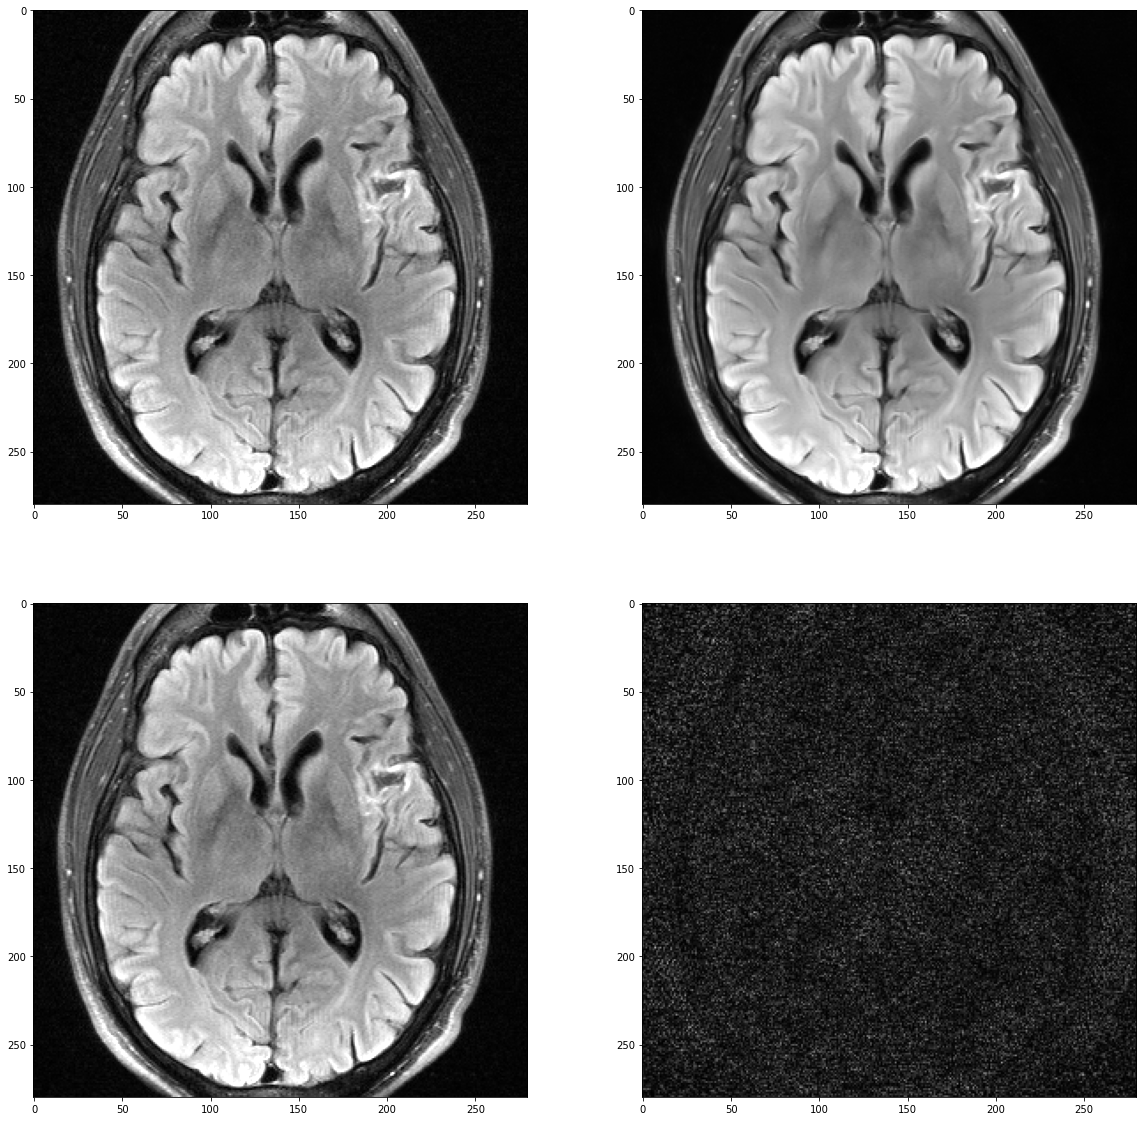

In [546]:
#idx = 4
inp = np.array(io.loadmat(eval_fnames[0] + '/data{}.mat'.format(idx))['inp'],dtype=float).squeeze()
out = np.array(io.loadmat(eval_fnames[0] + '/data{}.mat'.format(idx))['out'],dtype=float).squeeze()
lab = np.array(io.loadmat(eval_fnames[0] + '/data{}.mat'.format(idx))['lab'],dtype=float).squeeze()
#inp = np.array(io.loadmat(all_fnames[idx])['inp'],dtype=float).squeeze()
#out = np.array(io.loadmat(all_fnames[idx])['out'],dtype=float).squeeze()
#lab = np.array(io.loadmat(all_fnames[idx])['lab'],dtype=float).squeeze()
print(idx)
xmin = 20
xmax = 300
ymin = 20
ymax = 300

#inp = np.sqrt(inp[0,...] ** 2 + inp[1,...] ** 2)
#out = np.sqrt(out[0,...] ** 2 + out[1,...] ** 2)
#lab = np.sqrt(lab[0,...] ** 2 + lab[1,...] ** 2)

inp = np.rot90(inp)
out = np.rot90(out)
lab = np.rot90(lab)

vma = np.max(inp[xmin:xmax,ymin:ymax]) * 0.7
vmi = np.min(inp[xmin:xmax,ymin:ymax])
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(inp[xmin:xmax,ymin:ymax],cmap='gray',vmin=vmi,vmax=vma)
plt.subplot(2,2,2)
plt.imshow(out[xmin:xmax,ymin:ymax],cmap='gray',vmin=vmi,vmax=vma)
plt.subplot(2,2,3)
plt.imshow(lab[xmin:xmax,ymin:ymax],cmap='gray',vmin=vmi,vmax=vma)
plt.subplot(2,2,4)
plt.imshow(abs(out[xmin:xmax,ymin:ymax]-lab[xmin:xmax,ymin:ymax])*10,cmap='gray',vmin=vmi,vmax=vma)
plt.show()
idx += 10

In [438]:
### eval ###
root = '/home/juhyung/denoise/denoise/log'
eval_num = 27
eval_fnames_com = glob.glob(os.path.join(root, '{:05d}*'.format(27)))

root = '/home/juhyung/denoise/denoise/log'
eval_num = 28
eval_fnames_e1 = glob.glob(os.path.join(root, '{:05d}*'.format(28)))

root = '/home/juhyung/denoise/denoise/log'
eval_num = 29
eval_fnames_e4 = glob.glob(os.path.join(root, '{:05d}*'.format(29)))

idx = 0

180


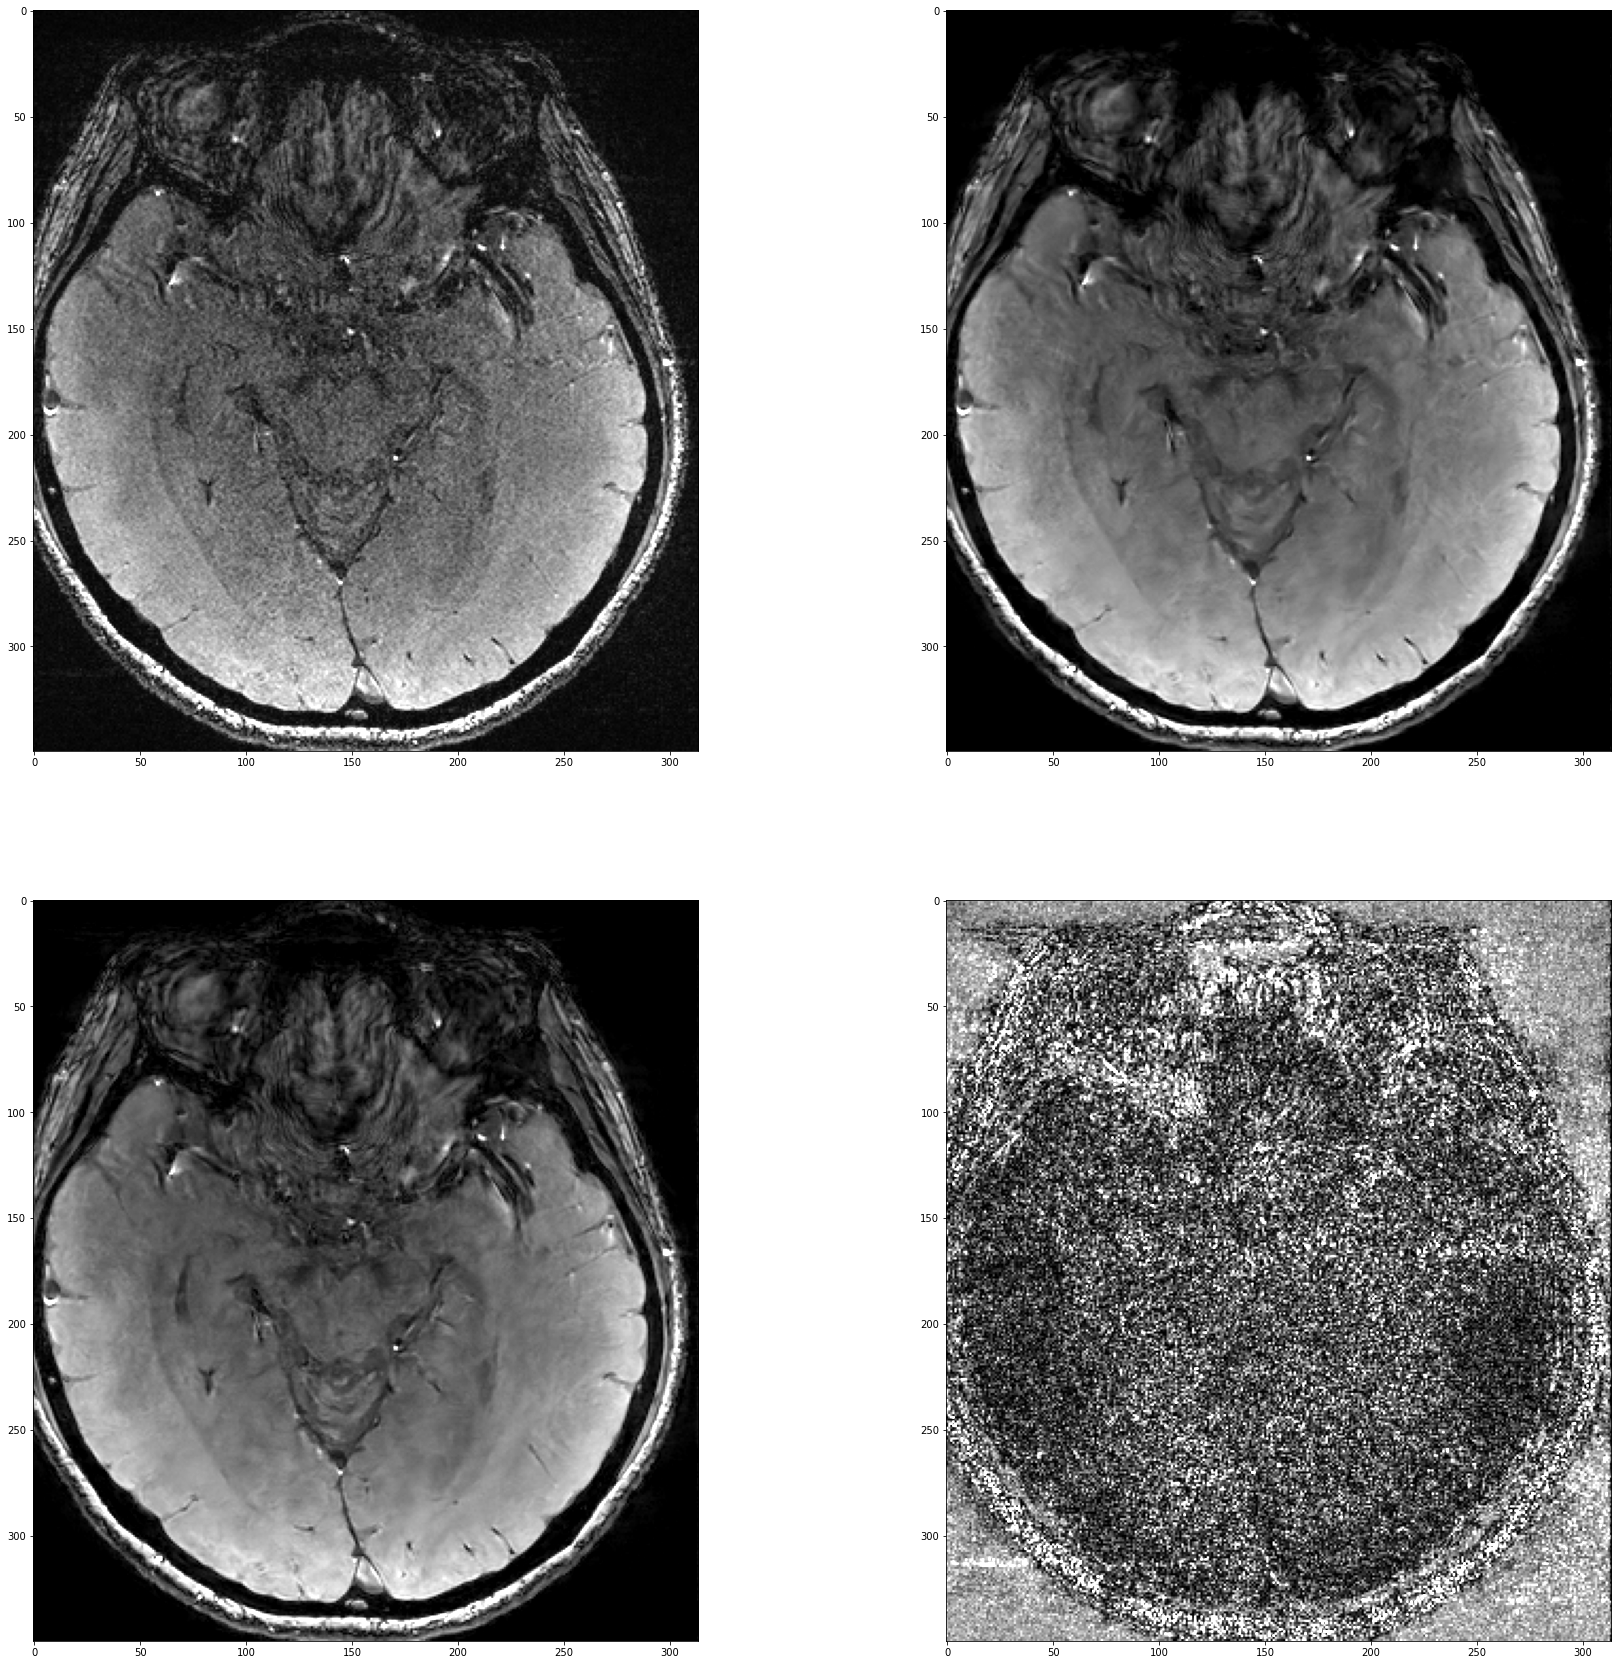

In [469]:
idx = 180
inp = np.array(io.loadmat(eval_fnames_e4[0] + '/eval/result_{}.mat'.format(idx))['inp'],dtype=float).squeeze() * 17.45620997375419
out = np.array(io.loadmat(eval_fnames_e4[0] + '/eval/result_{}.mat'.format(idx))['out'],dtype=float).squeeze() * 17.45620997375419
com_out = np.array(io.loadmat(eval_fnames_com[0] + '/eval/result_{}.mat'.format(idx))['out'],dtype=float).squeeze() * 23.635688436865646
e1_out = np.array(io.loadmat(eval_fnames_e1[0] + '/eval/result_{}.mat'.format(idx))['out'],dtype=float).squeeze() * 13.082429901324986

print(idx)
xmin = 50
xmax = 400
ymin = 20
ymax = 400

out_ret1 = com_out[0,...] - e1_out[0,...]
out_ret2 = com_out[1,...] - e1_out[1,...]

inp = np.sqrt(inp[0,...] ** 2 + inp[1,...] ** 2)
out = np.sqrt(out[0,...] ** 2 + out[1,...] ** 2)
#com_out = np.sqrt(com_out[0,...] ** 2 + com_out[1,...] ** 2)
e1_out = np.sqrt(e1_out[0,...] ** 2 + e1_out[1,...] ** 2)

out_ret = np.sqrt(out_ret1 ** 2 + out_ret2 ** 2 )
#inp = np.rot90(inp)
#out = np.rot90(out)
#lab = np.rot90(lab)

vma = np.max(inp[xmin:xmax,ymin:ymax]) * 0.25
vmi = np.min(inp[xmin:xmax,ymin:ymax])
plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
plt.imshow(inp[xmin:xmax,ymin:ymax],cmap='gray',vmin=vmi,vmax=vma)
plt.subplot(2,2,2)
plt.imshow(out[xmin:xmax,ymin:ymax],cmap='gray',vmin=vmi,vmax=vma)
plt.subplot(2,2,3)
plt.imshow(out_ret[xmin:xmax,ymin:ymax],cmap='gray',vmin=vmi,vmax=vma)
plt.subplot(2,2,4)
plt.imshow(np.abs(out_ret[xmin:xmax,ymin:ymax]-inp[xmin:xmax,ymin:ymax])*10,cmap='gray',vmin=vmi,vmax=vma)
plt.show()
idx += 1

In [279]:
img_raw = mat73.loadmat('/home/juhyung/data/SMWI_EJ_raw/0421/meas_MID00145_FID20039_SMwI_TR48FA20_original.mat')
img = img_raw['measc']

In [359]:
img = torch.randn([1, 30, 38, 3])
img = img.rot90(1,[1,2])
print(img.shape)

torch.Size([1, 38, 30, 3])
